# Customer Churn Prediction - Exploratory Data Analysis (EDA)

This notebook performs a comprehensive analysis of the Telco Customer Churn dataset.
**Goals:**
1. Understand the data structure and types.
2. Clean basic errors (e.g., data type conversions).
3. Perform Univariate Analysis to understand distributions.
4. Perform Bivariate Analysis to identify churn drivers.
5. Analyze correlations between features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 1. Data Loading & Cleaning

In [2]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Types & Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# TotalCharges should be numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Fill missing TotalCharges with 0 (likely new customers with tenure=0)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Drop customerID for analysis
df_eda = df.drop(columns=['customerID'])

Missing TotalCharges: 11


## 2. Target Variable Analysis (Churn)

In [5]:
churn_counts = df['Churn'].value_counts()
fig = px.pie(values=churn_counts, names=churn_counts.index, title='Overall Churn Rate', hole=0.4)
fig.show()

## 3. Univariate Analysis

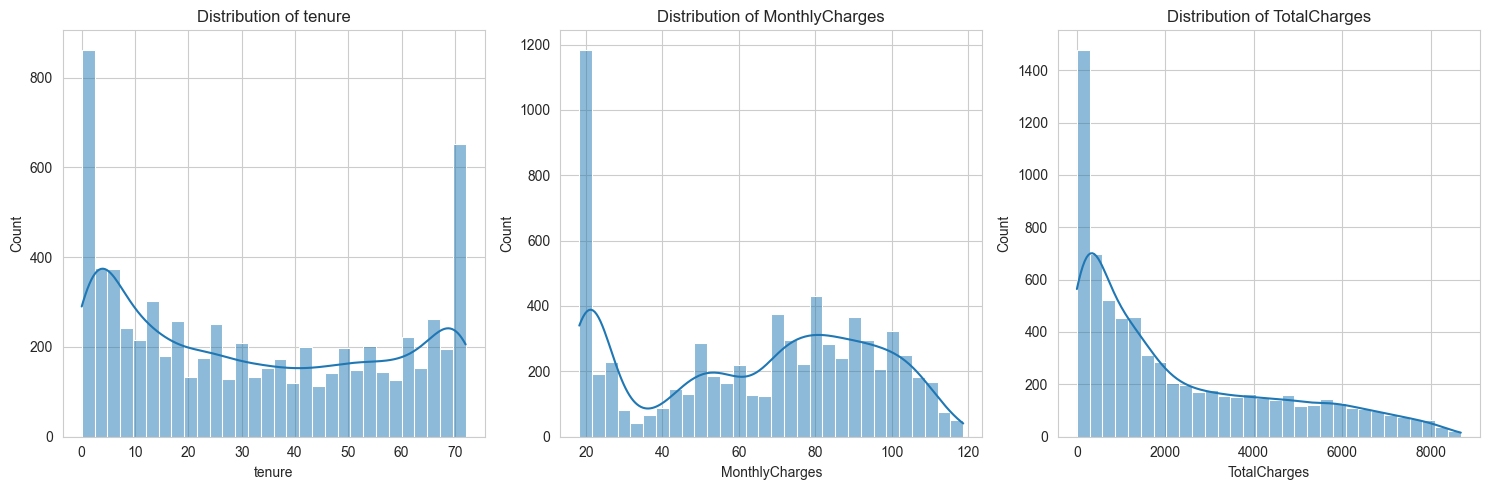

In [6]:
# Numerical Features Distribution
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_eda[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 4. Bivariate Analysis (Churn Drivers)

In [8]:
def plot_categorical_churn(col):
    temp = df.groupby(col)['Churn'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    fig = px.bar(temp, x=col, y='percentage', color='Churn', barmode='group', title=f'Churn by {col}')
    fig.show()

# Demographic Factors
plot_categorical_churn('gender')
plot_categorical_churn('SeniorCitizen')
plot_categorical_churn('Partner')
plot_categorical_churn('Dependents')

In [9]:
# Service Factors
plot_categorical_churn('InternetService')
plot_categorical_churn('Contract')
plot_categorical_churn('PaymentMethod')

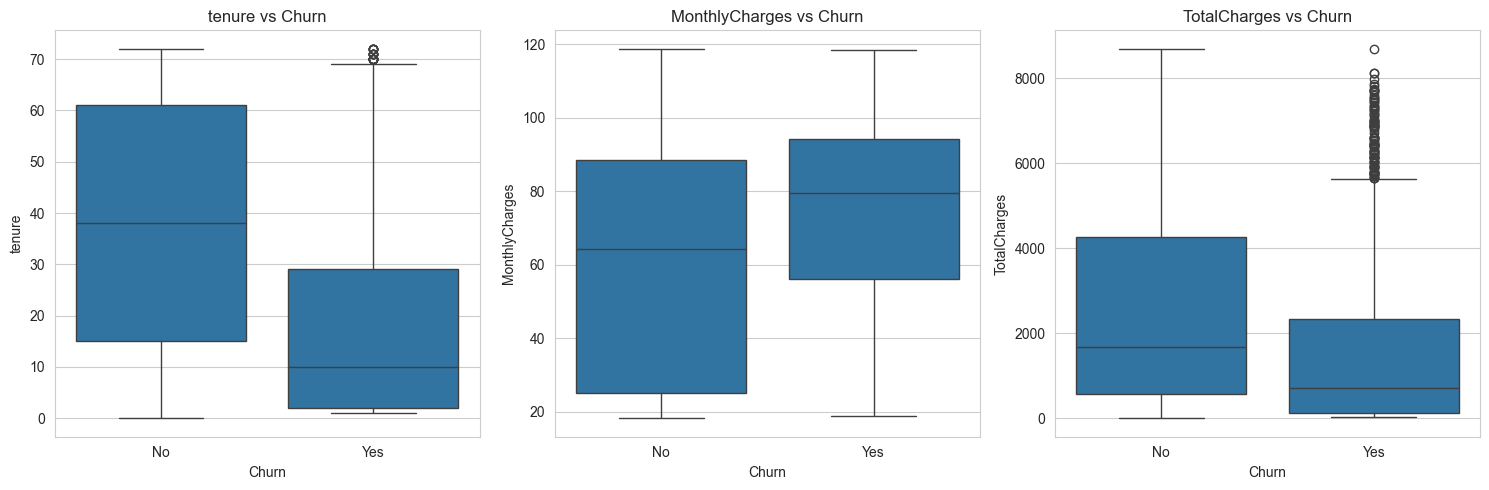

In [10]:
# Numerical Factors vs Churn
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df_eda)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

## 5. Multivariate Analysis (Correlation)

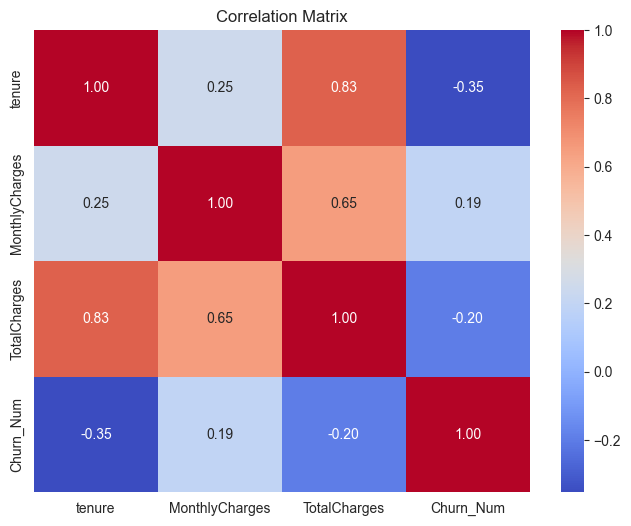

In [11]:
# Convert Churn to numeric for correlation
df_eda['Churn_Num'] = df_eda['Churn'].map({'Yes': 1, 'No': 0})

# Correlation Matrix of Numerical Features
corr = df_eda[num_cols + ['Churn_Num']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 6. Key Insights
1. **Contract**: Month-to-month customers have a much higher churn rate.
2. **Internet Service**: Fiber optic users churn more frequently than DSL.
3. **Tenure**: New customers (low tenure) are more likely to churn.
4. **Senior Citizens**: Higher churn rate compared to non-seniors.